In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 100
import straxen
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import leastsq as ls
from tqdm import tqdm
st = straxen.contexts.strax_workshop_dali()
straxen.download_test_data()
st.select_runs()

Checking data availability: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,events_available,event_info_available,peaks_available,raw_records_available,records_available
0,2017-06-07 10:19:51+00:00,kr83m_stable,170607_0919,10265,kr83m_stable,2017-06-07 09:19:48+00:00,"SourceOpening,_sciencerun1_candidate,_sciencerun1",142182.0,True,True,True,True,True
1,2017-06-21 07:17:25+00:00,background_stable,170621_0617,10635,background_stable,2017-06-21 06:17:24+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",19084.0,True,True,True,True,True
2,2018-02-15 10:30:55+00:00,background_triggerless,180215_1029,16854,background_triggerless,2018-02-15 10:29:52+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",858.0,True,True,True,True,True
3,2018-02-16 14:24:47+00:00,background_triggerless,180216_1324,16887,background_triggerless,2018-02-16 13:24:43+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
4,2018-02-16 15:55:09+00:00,background_triggerless,180216_1455,16889,background_triggerless,2018-02-16 14:55:06+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
5,2018-02-16 17:25:29+00:00,background_triggerless,180216_1625,16891,background_triggerless,2018-02-16 16:25:26+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
6,2018-02-17 00:57:19+00:00,background_triggerless,180216_2357,16901,background_triggerless,2018-02-16 23:57:16+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
7,2018-02-17 02:27:41+00:00,background_triggerless,180217_0127,16903,background_triggerless,2018-02-17 01:27:38+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
8,2018-02-17 03:58:03+00:00,background_triggerless,180217_0257,16905,background_triggerless,2018-02-17 02:58:00+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True
9,2018-02-17 05:28:23+00:00,background_triggerless,180217_0428,16907,background_triggerless,2018-02-17 04:28:20+00:00,"_sciencerun2_candidate,_sciencerun2_preliminary",36292.0,True,True,True,True,True


In [5]:
st.select_runs(include_tags='spe_topring')

,end,mode,name,number,reader.ini.name,start,tags,trigger.events_built,raw_records_available,peaks_available,events_available,event_info_available,records_available
31,2018-02-19 11:07:24+00:00,LED_3mus_stable,180219_1059,16986,LED_3mus_stable,2018-02-19 10:59:21+00:00,"spe_topring,_sciencerun2_candidate",193050.0,True,False,False,True,False


In [4]:
run_id='180219_1059'
df=st.get_array(run_id,'raw_records', seconds_range=(0, 4))

Not saving raw_records while selecting a time range in the run


In [5]:
st.data_info('raw_records')

,Field name,Data type,Comment
0,channel,int16,Channel/PMT number
1,dt,int16,Time resolution in ns
2,time,int64,Start time of the interval (ns since unix epoch)
3,length,int32,Length of the interval in samples
4,area,int32,Integral in ADC x samples
5,pulse_length,int32,Length of pulse to which the record belongs (without zero-padding)
6,record_i,int16,Fragment number in the pulse
7,baseline,float32,Baseline in ADC counts. data = int(baseline) - data_orig
8,reduction_level,uint8,Level of data reduction applied (strax.ReductionLevel enum)
9,data,"('<i2', (110,))",Waveform data in ADC counts above baseline


In [2]:
def choose_channel(x):
    return df[(df['channel']==x)]

def show_wave(x,y):
    return choose_channel(x)['data'][y]

def amp(x,y):
    return choose_channel(x)['data'][y].max()

def amp_distribution(x):
    amp_data=[]
    for i in range(len(choose_channel(x)['data'])):
        amp_data.append(amp(x,i))
    amp_data=np.array(amp_data)
    return amp_data

def gaus_fit(x_value,y_value,p0=[10,60,20]):

    def gaus(p,x):
        amp=p[0]
        mean=p[1]
        sig=p[2]
        return amp*e**(-(x-mean)**2/(2*sig**2))

    def gaus_res(p,x,y):
        return gaus(p,x)-y

    par,cor,a,b,c=ls(gaus_res,p0,args=(x_value,y_value),full_output=1)
    sq=(cor*np.sum(gaus_res(par,x_value,y_value)**2)/(len(x_value)-len(p0)))
    return par, sq

def gaus_fit_all(x):
    hist=np.histogram(amp_distribution(x),100)
    hist2=np.delete(hist[1],-1)
    hist=np.array([hist[0],hist2])

    fit=gaus_fit(hist[1][(hist[1]>20)],hist[0][(hist[1]>20)])
    
    return fit[0]

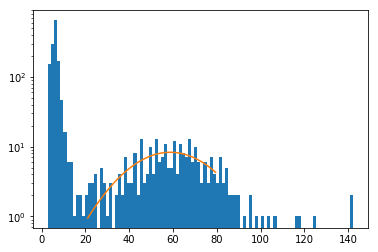

In [206]:
def gaus(p,x):
    amp=p[0]
    mean=p[1]
    sig=p[2]
    return amp*e**(-(x-mean)**2/(2*sig**2))

plt.hist(a,100)
plt.plot(hist[1][(hist[1]>20) & (hist[1]<80)],gaus(fit[0],hist[1][(hist[1]>20) & (hist[1]<80)]))
plt.yscale('log')
plt.show()

In [ ]:
database=[]
for i in tqdm(range(0,max(df['channel']+1))):
    try:
        database.append(gaus_fit_all(i))
    except: 
        database.append([1,1,1])
database=np.array(database)

 76%|███████▋  | 194/254 [41:59<12:59, 13.00s/it]

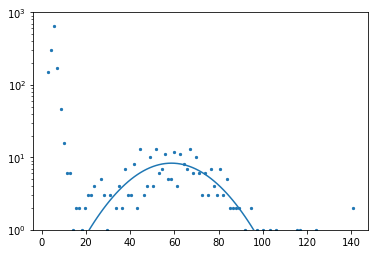

In [207]:
plt.scatter(hist[1],hist[0],5)
plt.plot(hist[1][(hist[1]>20)],gaus(fit[0],hist[1][(hist[1]>20)]))
plt.ylim(1,1000)
plt.yscale('log')
plt.show()

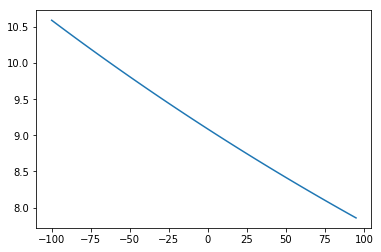

In [202]:
def pulse_locator(x):
    fit_para=database[x]
    range_max=fit_para[1]+fit_para[2]
    range_min=fit_para[1]-fit_para[2]
    amps=amp_distribution(x)
    single_electrons=np.wehre[(amps>range_min) & (amps<range_max)]